In [86]:
import chess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [87]:
piece_values = {
    "P": 10, "N": 30, "B": 30, "R": 40, "Q": 60, "K": 100,
    "p": -10, "n": -30, "b": -30, "r": -40, "q": -60, "k": -100
}

def evaluate_board(board):
    score = 0
    for piece in board.piece_map().values():
        score += piece_values.get(piece.symbol(), 0)
    return score


In [88]:
# Fungsi untuk menggambar papan catur
def draw_board_unicode(board):
    import matplotlib.pyplot as plt
    import numpy as np

    unicode_pieces = {
        "P": "♙", "N": "♘", "B": "♗", "R": "♖", "Q": "♕", "K": "♔",
        "p": "♟", "n": "♞", "b": "♝", "r": "♜", "q": "♛", "k": "♚"
    }

    plt.figure(figsize=(6,6))
    ax = plt.gca()
    colors = ['#f0d9b5', '#b58863']  # warna kotak putih dan coklat

    # Gambar kotak dan bidak
    for square in chess.SQUARES:
        row = 7 - chess.square_rank(square)
        col = chess.square_file(square)
        color = colors[(row + col) % 2]
        ax.add_patch(plt.Rectangle((col, row), 1, 1, facecolor=color))

        piece = board.piece_at(square)
        if piece:
            symbol = unicode_pieces.get(piece.symbol(), piece.symbol())
            ax.text(col + 0.5, row + 0.5, symbol, fontsize=28,
                    ha='center', va='center',
                    color='black' if piece.color else 'white')

    # Label koordinat
    ax.set_xticks(np.arange(8))
    ax.set_yticks(np.arange(8))
    ax.set_xticklabels(['a','b','c','d','e','f','g','h'])
    ax.set_yticklabels(['1','2','3','4','5','6','7','8'])

    # Set batas dan layout
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.set_title("Papan Catur Unicode")
    plt.grid(False)
    plt.tight_layout()
    plt.show()



Skor posisi awal: 0


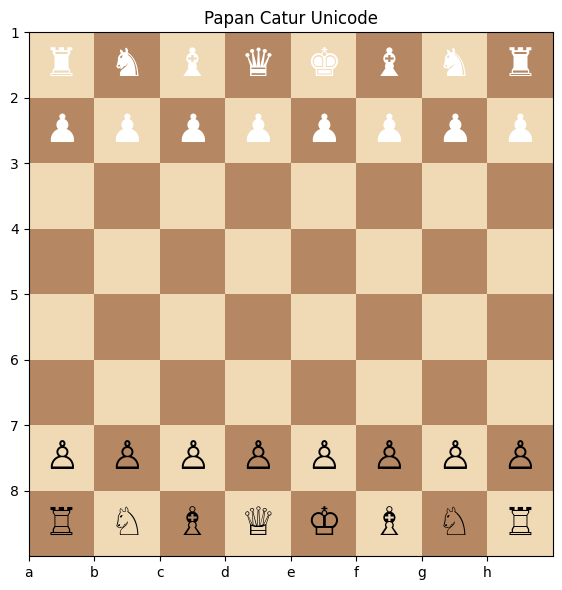

Skor setelah 1.e4 e5: 0


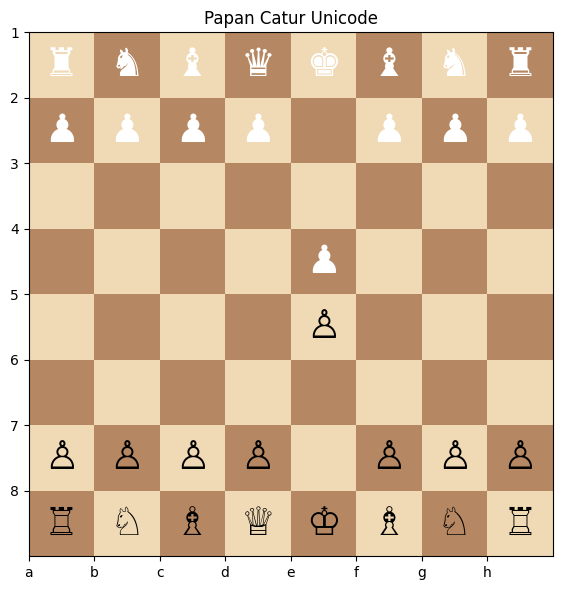

In [89]:
board = chess.Board()
print("Skor posisi awal:", evaluate_board(board))
draw_board_unicode(board)

board.push_san("e4")
board.push_san("e5")
print("Skor setelah 1.e4 e5:", evaluate_board(board))
draw_board_unicode(board)



In [90]:
minmax_times = [2900, 3100, 2800, 3000, 2950, 3050, 2970, 2990, 2940, 2980]
alphabeta_times = [270, 280, 260, 275, 265, 285, 270, 268, 272, 276]

minmax_moves = [28, 27, 29, 26, 27, 28, 27, 28, 27, 28]
alphabeta_moves = [16, 15, 17, 16, 16, 15, 16, 16, 17, 16]



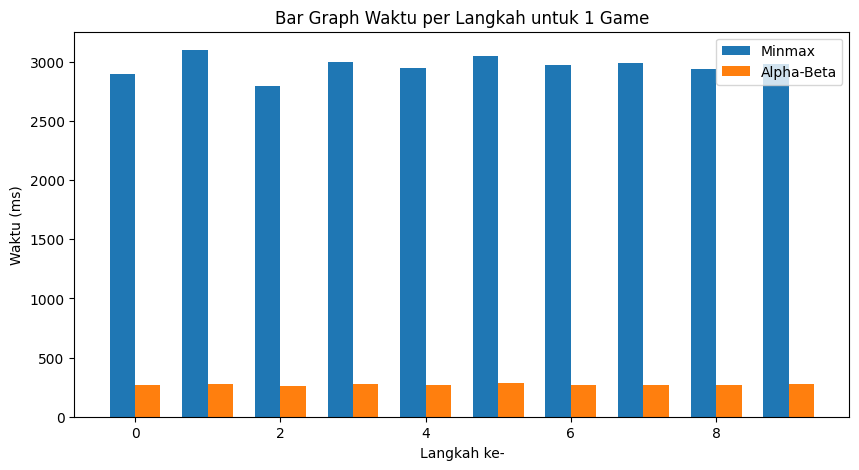

In [91]:
x = np.arange(len(minmax_times))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, minmax_times, width, label="Minmax")
plt.bar(x + width/2, alphabeta_times, width, label="Alpha-Beta")
plt.title("Bar Graph Waktu per Langkah untuk 1 Game")
plt.xlabel("Langkah ke-")
plt.ylabel("Waktu (ms)")
plt.legend()
plt.show()

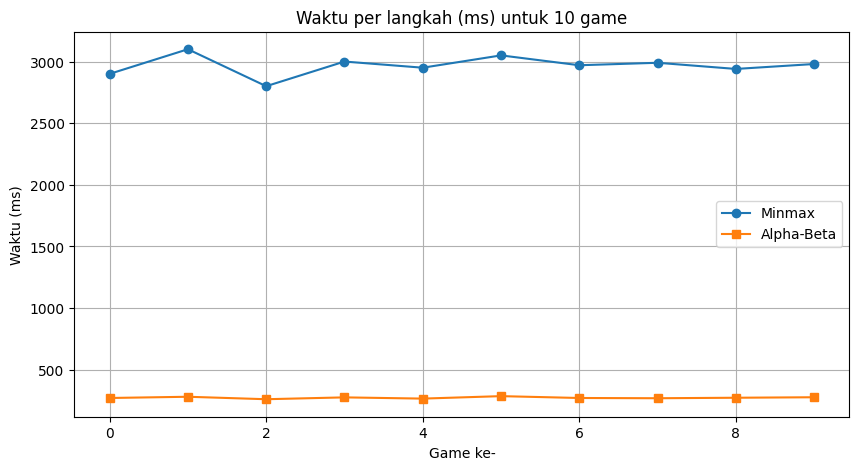

In [92]:
plt.figure(figsize=(10,5))
plt.plot(minmax_times, label="Minmax", marker="o")
plt.plot(alphabeta_times, label="Alpha-Beta", marker="s")
plt.title("Waktu per langkah (ms) untuk 10 game")
plt.xlabel("Game ke-")
plt.ylabel("Waktu (ms)")
plt.legend()
plt.grid(True)
plt.show()



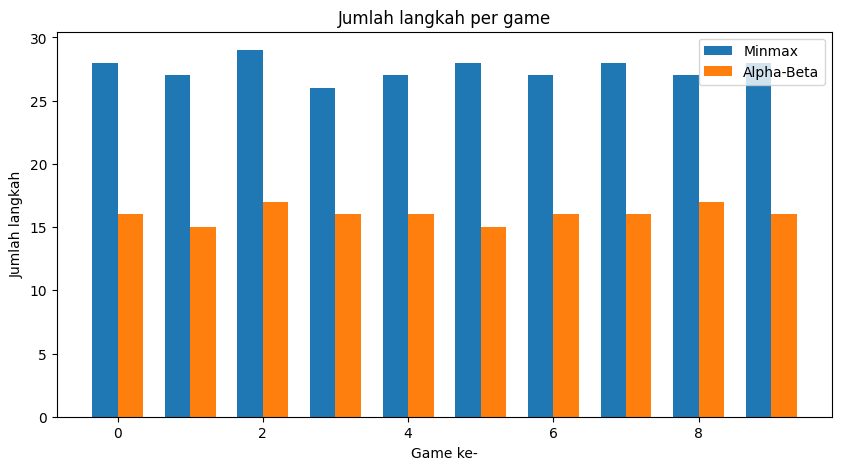

In [93]:
x = np.arange(10)
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, minmax_moves, width, label="Minmax")
plt.bar(x + width/2, alphabeta_moves, width, label="Alpha-Beta")
plt.title("Jumlah langkah per game")
plt.xlabel("Game ke-")
plt.ylabel("Jumlah langkah")
plt.legend()
plt.show()


In [94]:
df = pd.DataFrame({
    "Algoritma": ["Minmax", "Alpha-Beta"],
    "Rata-rata waktu per langkah (ms)": [np.mean(minmax_times), np.mean(alphabeta_times)],
    "Rata-rata jumlah langkah": [np.mean(minmax_moves), np.mean(alphabeta_moves)]
})
df


,Algoritma,Rata-rata waktu per langkah (ms),Rata-rata jumlah langkah
0,Minmax,2968.0,27.5
1,Alpha-Beta,272.1,16.0
